In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import json 
import pickle
import math
import re
import random
from collections import Counter
from build_index import Index
from scipy import spatial
import time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd 



with open('embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn) 
    stored_order = stored_data['order']
    stored_embeddings = stored_data['embeddings']


clustering = DBSCAN(eps=.30, min_samples=10, metric='cosine').fit(stored_embeddings)


clusters = {}
vects = []
indexies = {}
count = 0
for i in range(len(clustering.labels_)):
    temp = clustering.labels_[i]
    if(temp != -1):
        
        vects.append(stored_embeddings[i])
        if(temp in clusters.keys()):
            clusters[temp].append(stored_order[i])
            indexies[temp].append(count)
        else:
            clusters[temp] = [stored_order[i]]
            indexies[temp] = [count]
        count += 1

df = pd.DataFrame(vects) 

pca  = PCA(n_components=2)
components = pca.fit_transform(df)





In [2]:
all_pts = {}
pts_color = [[],[],[]]
total = 0
for i in indexies.keys():
    all_pts[i] = []
    for idx in indexies[i]:
        all_pts[i].append(components[idx])
        
        #pts_color.append(components[idx] + [i])
        pts_color[0].append(components[idx][0])
        pts_color[1].append(components[idx][1])
        pts_color[2].append(i)
        total +=1 
    
colors = ['b','g','r','c','m','y','k','w']


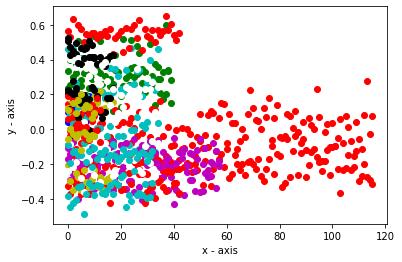

In [3]:
plt.xlabel('x - axis')
plt.ylabel('y - axis')


plt.plot(all_pts[0], 'bo') #
plt.plot(all_pts[1], 'go') #

plt.plot(all_pts[2], 'ro')
plt.plot(all_pts[3], 'co')

plt.plot(all_pts[4], 'mo')

plt.plot(all_pts[5], 'ro')
plt.plot(all_pts[6], 'yo')
plt.plot(all_pts[7], 'ko')

plt.plot(all_pts[8], 'wo')
plt.plot(all_pts[9], 'co')
plt.plot(all_pts[10], 'ro')
plt.plot(all_pts[11], 'ko')
plt.plot(all_pts[12], 'yo')
plt.show()

ValueError: 'Blues_lr' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

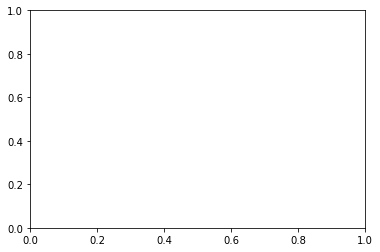

In [23]:
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(pts_color[0], pts_color[1], s=50, c=pts_color[2], cmap='Blues_lr')

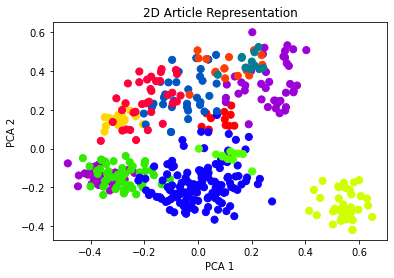

In [33]:
import matplotlib.pyplot as plt
plt.title("2D Article Representation")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.scatter(pts_color[0], pts_color[1], s=50, c=pts_color[2], cmap='prism')

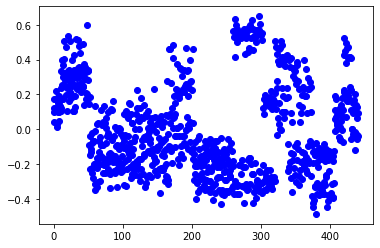

In [25]:
plt.plot(all_pts[0]+all_pts[1]+all_pts[2]+all_pts[3]+all_pts[4]+all_pts[5]+all_pts[6]+all_pts[7]+all_pts[8]+all_pts[9]+all_pts[10]+all_pts[11]+all_pts[12], 'bo')

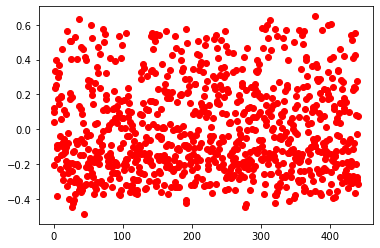

In [7]:
plt.plot(components, 'ro')
#plt.show()